### Hiring data example

In [19]:
!pip install pm4py --quiet

In [20]:
import pandas as pd
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer



In [21]:
# Sample hiring process data
hiring_data = [
    {"candidate_id": 1, "step": "Job Application", "timestamp": "2024-11-01 09:00:00"},
    {"candidate_id": 1, "step": "CV Selected", "timestamp": "2024-11-02 10:00:00"},
    {"candidate_id": 1, "step": "First Screening", "timestamp": "2024-11-03 15:00:00"},
    {"candidate_id": 1, "step": "HR Interview", "timestamp": "2024-11-05 14:00:00"},
    {"candidate_id": 1, "step": "Team Lead Interview", "timestamp": "2024-11-06 16:00:00"},
    {"candidate_id": 1, "step": "Head of Dept Interview", "timestamp": "2024-11-08 11:00:00"},
    {"candidate_id": 1, "step": "Offer", "timestamp": "2024-11-09 10:00:00"},
    {"candidate_id": 1, "step": "Accepted", "timestamp": "2024-11-10 09:00:00"},

    {"candidate_id": 2, "step": "Job Application", "timestamp": "2024-11-01 12:00:00"},
    {"candidate_id": 2, "step": "CV Selected", "timestamp": "2024-11-03 13:00:00"},
    {"candidate_id": 2, "step": "First Screening", "timestamp": "2024-11-04 09:00:00"},
    {"candidate_id": 2, "step": "HR Interview", "timestamp": "2024-11-05 10:00:00"},
    {"candidate_id": 2, "step": "Team Lead Interview", "timestamp": "2024-11-07 10:00:00"},
    {"candidate_id": 2, "step": "Head of Dept Interview", "timestamp": "2024-11-09 15:00:00"},
    {"candidate_id": 2, "step": "No Offer", "timestamp": "2024-11-10 18:00:00"},

    {"candidate_id": 3, "step": "Job Application", "timestamp": "2024-11-02 08:00:00"},
    {"candidate_id": 3, "step": "CV Selected", "timestamp": "2024-11-03 09:30:00"},
    {"candidate_id": 3, "step": "First Screening", "timestamp": "2024-11-04 14:00:00"},
    {"candidate_id": 3, "step": "HR Interview", "timestamp": "2024-11-06 13:00:00"},
    {"candidate_id": 3, "step": "Team Lead Interview", "timestamp": "2024-11-07 16:00:00"},
    {"candidate_id": 3, "step": "Head of Dept Interview", "timestamp": "2024-11-09 11:00:00"},
    {"candidate_id": 3, "step": "Offer", "timestamp": "2024-11-10 14:00:00"},
    {"candidate_id": 3, "step": "Declined", "timestamp": "2024-11-11 10:00:00"}
]



In [22]:
for record in hiring_data:
    print(record)

{'candidate_id': 1, 'step': 'Job Application', 'timestamp': '2024-11-01 09:00:00'}
{'candidate_id': 1, 'step': 'CV Selected', 'timestamp': '2024-11-02 10:00:00'}
{'candidate_id': 1, 'step': 'First Screening', 'timestamp': '2024-11-03 15:00:00'}
{'candidate_id': 1, 'step': 'HR Interview', 'timestamp': '2024-11-05 14:00:00'}
{'candidate_id': 1, 'step': 'Team Lead Interview', 'timestamp': '2024-11-06 16:00:00'}
{'candidate_id': 1, 'step': 'Head of Dept Interview', 'timestamp': '2024-11-08 11:00:00'}
{'candidate_id': 1, 'step': 'Offer', 'timestamp': '2024-11-09 10:00:00'}
{'candidate_id': 1, 'step': 'Accepted', 'timestamp': '2024-11-10 09:00:00'}
{'candidate_id': 2, 'step': 'Job Application', 'timestamp': '2024-11-01 12:00:00'}
{'candidate_id': 2, 'step': 'CV Selected', 'timestamp': '2024-11-03 13:00:00'}
{'candidate_id': 2, 'step': 'First Screening', 'timestamp': '2024-11-04 09:00:00'}
{'candidate_id': 2, 'step': 'HR Interview', 'timestamp': '2024-11-05 10:00:00'}
{'candidate_id': 2, 'ste

In [23]:
# Convert data to DataFrame
df = pd.DataFrame(hiring_data)

# Ensure correct types for PM4Py
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert to datetime
df = dataframe_utils.convert_timestamp_columns_in_df(df)  # PM4Py utility

# Rename columns to PM4Py format
df = df.rename(columns={
    "candidate_id": "case:concept:name",
    "step": "concept:name",
    "timestamp": "time:timestamp"
})

# Convert DataFrame to event log
log = log_converter.apply(df)

In [24]:
df

,case:concept:name,concept:name,time:timestamp
0,1,Job Application,2024-11-01 09:00:00+00:00
1,1,CV Selected,2024-11-02 10:00:00+00:00
2,1,First Screening,2024-11-03 15:00:00+00:00
3,1,HR Interview,2024-11-05 14:00:00+00:00
4,1,Team Lead Interview,2024-11-06 16:00:00+00:00
5,1,Head of Dept Interview,2024-11-08 11:00:00+00:00
6,1,Offer,2024-11-09 10:00:00+00:00
7,1,Accepted,2024-11-10 09:00:00+00:00
8,2,Job Application,2024-11-01 12:00:00+00:00
9,2,CV Selected,2024-11-03 13:00:00+00:00


In [25]:
trace =log[0] ## Pathway of one candidate
trace

{'attributes': {'concept:name': 1}, 'events': [{'concept:name': 'Job Application', 'time:timestamp': Timestamp('2024-11-01 09:00:00+0000', tz='UTC')}, '..', {'concept:name': 'Accepted', 'time:timestamp': Timestamp('2024-11-10 09:00:00+0000', tz='UTC')}]}

In [26]:
event = trace[1] ## Single event
event

{'concept:name': 'CV Selected', 'time:timestamp': Timestamp('2024-11-02 10:00:00+0000', tz='UTC')}

### Number of candidates in each step

In [27]:
# Calculate the number of candidates and the average time per step
step_numbers= df.groupby('concept:name').agg(
    candidates=('case:concept:name', 'nunique'),  # Count unique candidates at each step
).reset_index()


In [28]:
print(step_numbers)

             concept:name  candidates
0                Accepted           1
1             CV Selected           3
2                Declined           1
3         First Screening           3
4            HR Interview           3
5  Head of Dept Interview           3
6         Job Application           3
7                No Offer           1
8                   Offer           2
9     Team Lead Interview           3


### Explore traces and events
- Trace: full pathway of actions for one person
- Event: Single event

In [29]:
trace = log[0]	# Get first trace
trace

{'attributes': {'concept:name': 1}, 'events': [{'concept:name': 'Job Application', 'time:timestamp': Timestamp('2024-11-01 09:00:00+0000', tz='UTC')}, '..', {'concept:name': 'Accepted', 'time:timestamp': Timestamp('2024-11-10 09:00:00+0000', tz='UTC')}]}

In [30]:
event = trace[0]	# Get first event in trace
event

{'concept:name': 'Job Application', 'time:timestamp': Timestamp('2024-11-01 09:00:00+0000', tz='UTC')}

In [31]:
t = 1
e = 1

for trace in log:
    e = 1
    for event in trace:
        case_name = event["concept:name"]  # Case name attribute
        timestamp = event["time:timestamp"]  # Timestamp attribute
        print(f"Candidate {t} ,Event {e}: {case_name}, Timestamp: {timestamp}")
        e += 1
    t += 1

Candidate 1 ,Event 1: Job Application, Timestamp: 2024-11-01 09:00:00+00:00
Candidate 1 ,Event 2: CV Selected, Timestamp: 2024-11-02 10:00:00+00:00
Candidate 1 ,Event 3: First Screening, Timestamp: 2024-11-03 15:00:00+00:00
Candidate 1 ,Event 4: HR Interview, Timestamp: 2024-11-05 14:00:00+00:00
Candidate 1 ,Event 5: Team Lead Interview, Timestamp: 2024-11-06 16:00:00+00:00
Candidate 1 ,Event 6: Head of Dept Interview, Timestamp: 2024-11-08 11:00:00+00:00
Candidate 1 ,Event 7: Offer, Timestamp: 2024-11-09 10:00:00+00:00
Candidate 1 ,Event 8: Accepted, Timestamp: 2024-11-10 09:00:00+00:00
Candidate 2 ,Event 1: Job Application, Timestamp: 2024-11-01 12:00:00+00:00
Candidate 2 ,Event 2: CV Selected, Timestamp: 2024-11-03 13:00:00+00:00
Candidate 2 ,Event 3: First Screening, Timestamp: 2024-11-04 09:00:00+00:00
Candidate 2 ,Event 4: HR Interview, Timestamp: 2024-11-05 10:00:00+00:00
Candidate 2 ,Event 5: Team Lead Interview, Timestamp: 2024-11-07 10:00:00+00:00
Candidate 2 ,Event 6: Head o

### Process mining (simple examples)

### 1. Petri net
- A graphical representation of process and setps

In [32]:
# Discover the process model using Alpha Miner
net, initial_marking, final_marking = alpha_miner.apply(log)

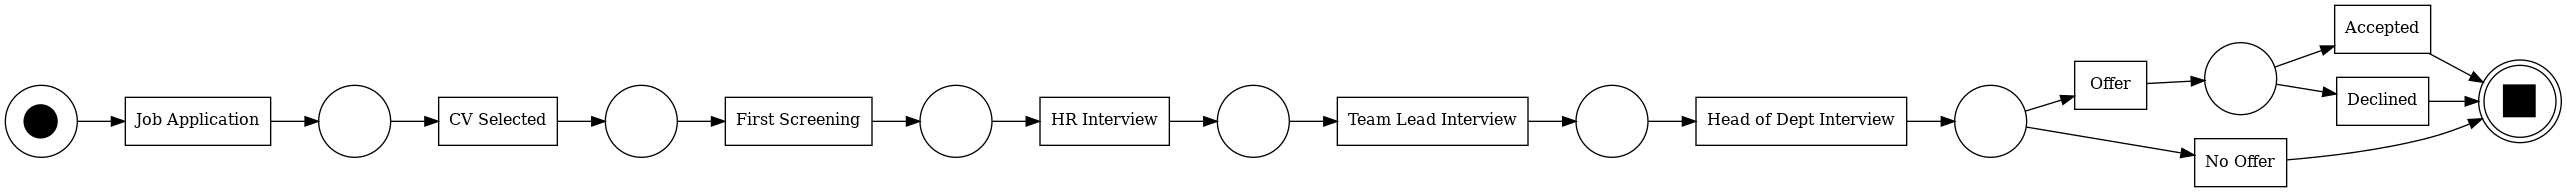

In [33]:
# Visualize the process model
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

### Performance analysis

In [34]:
# Iterate over each trace in the event log
results = []

for i, trace in enumerate(log, 1):
    candidate = i   # Candidate number
    num_steps = len(trace)  # Count the number of steps for the candidate
    start_time = trace[0]['time:timestamp']  # Start time of the candidate's process
    end_time = trace[-1]['time:timestamp']  # End time of the candidate's process
    duration = (end_time - start_time).total_seconds() / 3600  # Duration in hours
    avg_time = round(duration / num_steps, 1)  # Average time per step (in hours)
    duration = round(duration, 1)  # Round total duration to 1 decimal place

    # Collect the results for each candidate
    results.append({
        'Candidate': candidate,
        'Num_Steps': num_steps,
        'Total_Time_Hours': duration,
        'Avg_Time_Per_Step_Hours': avg_time
    })

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Print the DataFrame
df_results


,Candidate,Num_Steps,Total_Time_Hours,Avg_Time_Per_Step_Hours
0,1,8,216.0,27.0
1,2,7,222.0,31.7
2,3,8,218.0,27.2


### Time statistics between steps

In [35]:
# Initialize a list to store the results
step_time_stats = []

# Iterate over each trace (candidate's events)
for trace in log:
    for i in range(1, len(trace)):
        # Get the current step and previous step
        prev_event = trace[i-1]
        curr_event = trace[i]

        # Extract the event names and timestamps
        prev_step = prev_event['concept:name']
        curr_step = curr_event['concept:name']
        prev_timestamp = prev_event['time:timestamp']
        curr_timestamp = curr_event['time:timestamp']

        # Calculate the time difference (in hours) between the previous and current step
        time_diff = (curr_timestamp - prev_timestamp).total_seconds() / 3600  # Convert to hours

        # Append the result to the list
        step_time_stats.append({
            'Previous_Step': prev_step,
            'Current_Step': curr_step,
            'Time_Spent_Hours': round(time_diff, 1)  # Round to 1 decimal place
        })

# Convert the results to a DataFrame for easier analysis
df_step_time_stats = pd.DataFrame(step_time_stats)

# Print the DataFrame
print(df_step_time_stats)

             Previous_Step            Current_Step  Time_Spent_Hours
0          Job Application             CV Selected              25.0
1              CV Selected         First Screening              29.0
2          First Screening            HR Interview              47.0
3             HR Interview     Team Lead Interview              26.0
4      Team Lead Interview  Head of Dept Interview              43.0
5   Head of Dept Interview                   Offer              23.0
6                    Offer                Accepted              23.0
7          Job Application             CV Selected              49.0
8              CV Selected         First Screening              20.0
9          First Screening            HR Interview              25.0
10            HR Interview     Team Lead Interview              48.0
11     Team Lead Interview  Head of Dept Interview              53.0
12  Head of Dept Interview                No Offer              27.0
13         Job Application        

In [36]:
### We have time between each steap (for each candidate)

# From this we can calculate average lenght of each step